In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score


In [4]:
df = pd.read_csv('/kaggle/input/acl-project-task-3/Reviews_Cleaned.csv')

In [7]:
df.head()

,Passenger_Name,Route,Route_clean,Traveler_Type,Class,Rating,satisfaction,Verified_bool,Sentiment_score,Sentiment_label,Review_text
0,Paige Boet,New Orleans to London,neworleans-london,Solo Leisure,Economy Class,1,0,1,-0.8315,negative,The airline lost my luggage. The airline lost ...
1,S Layne,London to Amman,london-amman,Couple Leisure,Business Class,1,0,1,0.7184,positive,fully refunded by our travel insurance. We boo...
2,E Lanewoski,Heathrow to Bodrum,heathrow-bodrum,Solo Leisure,Business Class,2,0,1,-0.7964,negative,no boarding drinks provided. First time flying...
3,Joel Burman,Amman to London,amman-london,Solo Leisure,Economy Class,4,0,0,-0.5849,negative,WiFi didn't work. You can buy sandwiches and c...
4,R Vines,London City to Ibiza,londoncity-ibiza,Family Leisure,Business Class,7,1,1,0.9657,positive,stick with economy. This is a two-for-one revi...


In [35]:
X = df[['Traveler_Type','Route','Route_clean', 'Class', 'Verified_bool', 'Sentiment_score']]
y = df['satisfaction']

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['Traveler_Type', 'Route', 'Route_clean', 'Class'], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)

In [40]:
#Explore the size and dimension of the train and test data after splitting:
print("Train data shape:",X_train.shape, "Train Label shape", y_train.shape)
print("Test data shape:",X_test.shape, "Test Label shape", y_test.shape)

Train data shape: (2860, 2979) Train Label shape (2860,)
Test data shape: (715, 2979) Test Label shape (715,)


In [59]:
model = Sequential([
Input(shape=(X_train.shape[1],)),
layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid') # binary classification
])
model.summary() #

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 16)             │        47,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,825 (186.82 KB)

 Trainable params: 47,825 (186.82 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy',
Precision(name='precision'),
Recall(name='recall')])


In [62]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2,
verbose=1)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5327 - loss: 0.7923 - precision: 0.5344 - recall: 0.6318 - val_accuracy: 0.4615 - val_loss: 1.3087 - val_precision: 0.4522 - val_recall: 0.3636
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6478 - loss: 0.6330 - precision: 0.6719 - recall: 0.5131 - val_accuracy: 0.5385 - val_loss: 1.4516 - val_precision: 0.5278 - val_recall: 0.7308
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7433 - loss: 0.4931 - precision: 0.7320 - recall: 0.7385 - val_accuracy: 0.5612 - val_loss: 1.4289 - val_precision: 0.5485 - val_recall: 0.6923
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7995 - loss: 0.4162 - precision: 0.7977 - recall: 0.7853 - val_accuracy: 0.5542 - val_loss: 1.3898 - val_precision: 0.5416 - val_recall: 0.7063
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8259 - loss: 0.3641 - precision: 0.8169 - recall: 0.8111 - val_accuracy: 0.5752 - val_loss: 1.3472 - va

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3,
restore_best_weights=True)
history = model.fit(X_train, y_train,
epochs=50,
validation_split=0.2,
verbose=1,
callbacks=[early_stop])

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9038 - loss: 0.2140 - precision: 0.8791 - recall: 0.9265 - val_accuracy: 0.6329 - val_loss: 1.1393 - val_precision: 0.6073 - val_recall: 0.7517
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8950 - loss: 0.2280 - precision: 0.8616 - recall: 0.9292 - val_accuracy: 0.6434 - val_loss: 1.1314 - val_precision: 0.6199 - val_recall: 0.7413
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9068 - loss: 0.2037 - precision: 0.8670 - recall: 0.9429 - val_accuracy: 0.6346 - val_loss: 1.1595 - val_precision: 0.6097 - val_recall: 0.7483
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9147 - loss: 0.1940 - precision: 0.8928 - recall: 0.9368 - val_accuracy: 0.6538 - val_loss: 1.1325 - val_precision: 0.6302 - val_recall: 0.7448
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9152 - loss: 0.1992 - precision: 0.8869 - recall: 0.9466 - val_accuracy: 0.6329 - val_loss: 1.2071 - val

In [64]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
validation_split=0.2, verbose=1)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9190 - loss: 0.1819 - precision: 0.8882 - recall: 0.9452 - val_accuracy: 0.6556 - val_loss: 1.2069 - val_precision: 0.6328 - val_recall: 0.7413
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9199 - loss: 0.1840 - precision: 0.9025 - recall: 0.9358 - val_accuracy: 0.6573 - val_loss: 1.2174 - val_precision: 0.6316 - val_recall: 0.7552
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9230 - loss: 0.1728 - precision: 0.8988 - recall: 0.9439 - val_accuracy: 0.6556 - val_loss: 1.1876 - val_precision: 0.6328 - val_recall: 0.7413
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9221 - loss: 0.1842 - precision: 0.8935 - recall: 0.9468 - val_accuracy: 0.6678 - val_loss: 1.1763 - val_precision: 0.6437 - val_recall: 0.7517
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9153 - loss: 0.1815 - precision: 0.8915 - recall: 0.9380 - val_accuracy: 0.6661 - val_loss: 1.2278 - val

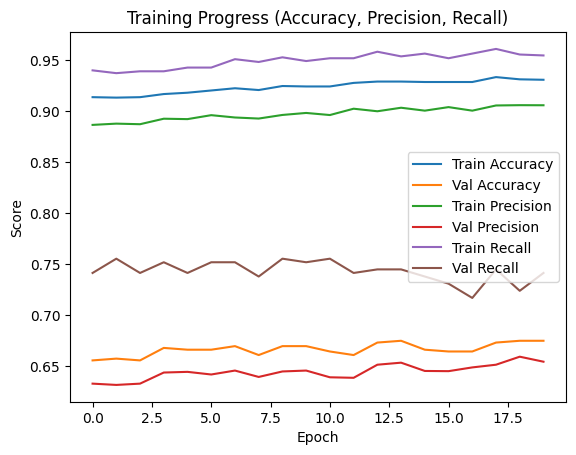

In [65]:
# Plot accuracy, precision, and recall from training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Training Progress (Accuracy, Precision, Recall)')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import f1_score

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate F1 score
test_f1 = f1_score(y_test, y_pred)

# Print all test metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Loss: 1.2670612335205078
Test Accuracy: 0.6881119012832642
Test Precision: 0.6378896832466125
Test Recall: 0.7869822382926941
Test F1 Score: 0.7046357615894039
